In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
ratings=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Datasets/MovieLens 20M/rating.csv")

In [4]:
ratings.shape

(20000263, 4)

In [5]:
ratings.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
movies = pd.read_csv('/content/drive/MyDrive/FSDS @Kodi Senapati/Datasets/MovieLens 20M/movie.csv', sep=',')
tags = pd.read_csv('/content/drive/MyDrive/FSDS @Kodi Senapati/Datasets/MovieLens 20M/tag.csv', sep=',')

In [9]:
print(movies.shape)
print(tags.shape)
print(ratings.shape)


(27278, 3)
(465564, 4)
(20000263, 4)


In [10]:
print(movies.columns)
print(tags.columns)
print(ratings.columns)


Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


**For current analysis, we will remove timestamp**

In [11]:
del tags['timestamp']
del ratings['timestamp']

In [12]:
print(movies.columns)
print(tags.columns)
print(ratings.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')


# iloc
Python's iloc() function is an important tool in Pandas for data manipulation. It allows the selection and retrieval of specific rows and columns in DataFrames or Series using integer-based indexing. iloc() allows to identification data by specifying row and column indices numerically. For instance, df.iloc[0] retrieves the first row, while df.iloc[:, 2] fetches the third column for all rows.



In [13]:
tags.iloc[0]

,0
userId,18
movieId,4141
tag,Mark Waters


In [19]:
# Assign 1st row value to row_0
row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [20]:
# Assign 2nd row value to row_1
row_1=tags.iloc[1]
print(row_1)

userId            65
movieId          208
tag        dark hero
Name: 1, dtype: object


In [16]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [17]:
row_0['userId']

18

In [23]:
print(row_0.name) # defaultly prints 0

#Assign name
row_0=row_0.rename('FirstRow')

print(row_0.name)

0
FirstRow


**DataFrames**

In [24]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [25]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [28]:
# add multiple square brackets to get data of indexes mentioned
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


**Descriptive Statistics**

In [30]:
movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [31]:
tags.describe()

,userId,movieId
count,465564.000000,465564.000000
mean,68712.354263,32627.762920
std,41877.674053,36080.241157
min,18.000000,1.000000
25%,28780.000000,2571.000000
50%,70201.000000,7373.000000
75%,107322.000000,62235.000000
max,138472.000000,131258.000000


In [35]:
print('Mean:',ratings['rating'].mean())
print('Max:',ratings['rating'].max())
print('Min:',ratings['rating'].min())
print('Standard Dev:',ratings['rating'].std())
print('Mode:',ratings['rating'].mode())
print('Correlation:',ratings.corr())


Mean: 3.5255285642993797
Max: 5.0
Min: 0.5
Standard Dev: 1.0519889192942424
Mode: 0    4.0
Name: rating, dtype: float64
Correlation:            userId   movieId    rating
userId   1.000000 -0.000850  0.001175
movieId -0.000850  1.000000  0.002606
rating   0.001175  0.002606  1.000000


In [36]:
# ratings above than 3.5
filter=ratings['rating']>3.5

print(filter)

0           False
1           False
2           False
3           False
4           False
            ...  
20000258     True
20000259     True
20000260    False
20000261     True
20000262    False
Name: rating, Length: 20000263, dtype: bool


In [37]:
filter2 = ratings['rating'] > 0
filter2.all()

True

**Data Cleaning: Handling Missing Data**

In [40]:
# Find wether there are any Null values

print(tags.isnull().sum())
print(movies.isnull().sum())
print(ratings.isnull().sum())

userId      0
movieId     0
tag        16
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId     0
movieId    0
rating     0
dtype: int64


In [41]:
# Find the Null Values with True/False
print(ratings.isnull().any().any())
print(tags.isnull().any().any())
print(movies.isnull().any().any())

False
True
False


In [43]:
# Tags have NULL Values we need cleaning

print(tags.shape)

tags=tags.dropna()

print(tags.shape)

print(tags.isnull().any().any())

(465564, 3)
(465548, 3)
False


**Data Visualization**

In [47]:
import matplotlib.pyplot as plt
import numpy as np

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

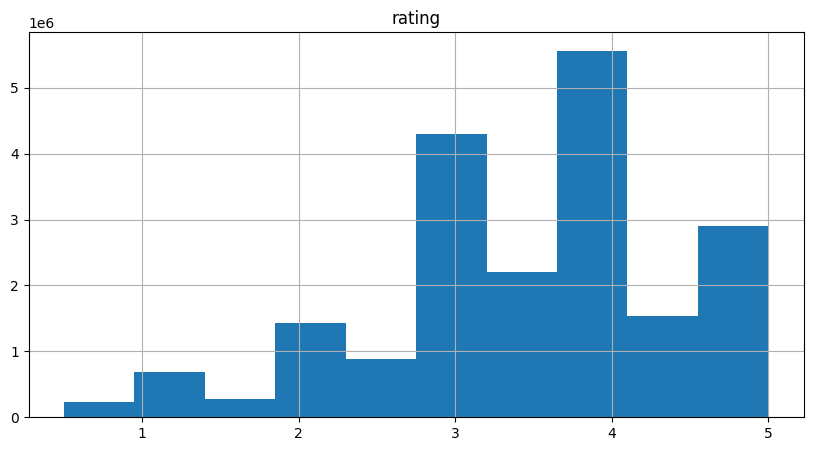

In [49]:

ratings.hist(column='rating', figsize=(10,5))

<Axes: >

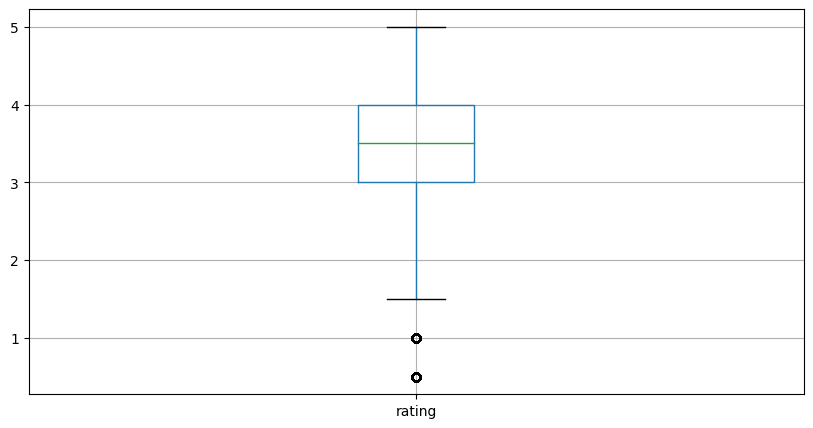

In [50]:
ratings.boxplot(column='rating', figsize=(10,5))

**Slicing Out Columns**

In [51]:
ratings['rating'].head()

,rating
0,3.5
1,3.5
2,3.5
3,3.5
4,3.5


In [53]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [55]:
movies[['movieId','title']].head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [56]:
movies[:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [59]:
tag_counts=tags['tag'].value_counts()
tag_counts

,count
tag,
sci-fi,3384
based on a book,3281
atmospheric,2917
comedy,2779
action,2657
...,...
Paul Adelstein,1
the wig,1
killer fish,1


<Axes: ylabel='count'>

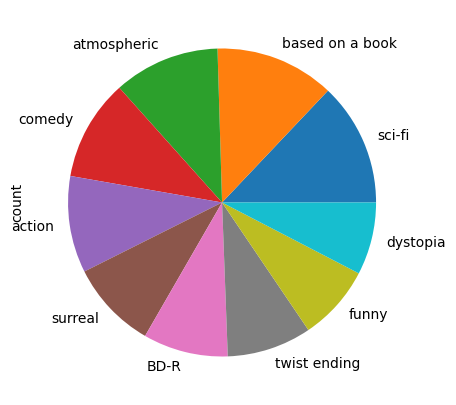

In [60]:
tag_counts[:10].plot(kind='pie', figsize=(10,5))